# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Friday week 7 - Fri 24 Sep 2021 11:59PM </div>

# 1. Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

# 2. Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The labels of the first 2,000 test examples are given, you will analyse the performance of your proposed method by exploiting the 2,000 test examples. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose. <br />
Here are examples illustrating sample of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:<br />
0 T-shirt/Top<br />
1 Trouser<br />
2 Pullover<br />
3 Dress<br />
4 Coat<br />
5 Sandal<br />
6 Shirt<br />
7 Sneaker<br />
8 Bag<br />
9 Ankle boot <br />

# 3. How to load the data and make output prediciton
There is a Input folder including 4 main files (which can be downloaded from Canvas):

    1. images_training.h5 (30000 image samples for training)
    
    2. labels_training.h5 (30000 image lables for training)
    
    3. images_testing.h5 (5000 image samples for making prediction)
    
    4. labels_testing_2000.h5 (only 2000 image lables for testing, 3000 labels are not provided)

## 3.1 How to load the data

To read the *hdf5* file and load the data into a numpy array. 

The **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

Then data would be a numpy array of the shape (30000, 784), and label would be a numpy array of the shape (30000, ).

It is noted that the **labels_testing_2000** only contain **2000 samples** for your self-testing. The validation test for **fine-tuning parameters** should be splitted from the training test. We will evaluate your model on full 5000 samples which is not provided. The file **images_testing.h5** can be loaded in a similar way.

In [1]:
import h5py
import numpy as np
import os
print(os.listdir("./Input/train"))#setwd() dict

['images_training.h5', 'labels_training.h5']


In [2]:
with h5py.File('./Input/train/images_training.h5','r') as H: #784 = 28*28
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape,data_test.shape,label_test.shape)

(30000, 784) (30000,) (5000, 784) (2000,)


# 4. Task description

Your task is to determine / build a classifier for the given data set to classify images into categories and write a report. The score allocation is as follows:

    * Code: max 65 points
    * Report: max 35 points
    
Please refer to the rubric in Canvas for detailed marking scheme. The report and the code are to be submitted in Canvas by the due date.<br />

## 4.1 Code
### The code must clearly show :
    1. Pre-process data
    1. Details of your implementation for each algorithm
    2. Fine-tune hyper-parameters for each algorithm and running time
    3. The comparison result between algorithms
    4. Hardware and software specifications of the computer that you used for performance evaluation

### 4.1.1 Data pre-processing

You will need to have at least one pre-process techique before you can apply the classification algorithms. One of pre-process techique is using **Normalisation**.

In [3]:
from sklearn.model_selection import train_test_split
X = data_train #from above whole data, for training
y = label_train #from above whole label, for training
X_train, X_test, y_train, y_test = train_test_split(data_train, label_train, test_size=0.3)

X_predict = data_test[:2000] #for validation 2000 data
#X_output = data_test[2000:]#for result and output h5 files 3000 data
X_output = data_test

#X_train = data_train
#y_train = label_train
#y_test = label_test
#X_train = X_train.reshape(30000, -1)


In [4]:
#Normalize the Data (mean = 0 and variance = 1) y=mx+b
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X) 
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test) 
X_predict_norm =  scaler.transform(X_predict) 
X_output_norm =  scaler.transform(X_output) 


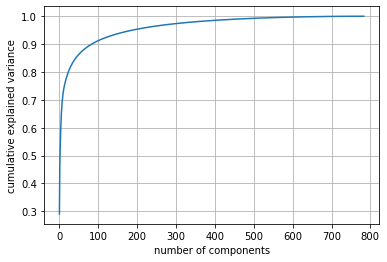

In [5]:
#PCA Analysis 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

X_pca = pca.fit_transform(X_norm)
X_train = pca.transform(X_train_norm)
X_test = pca.transform(X_test_norm)
X_predict = pca.transform(X_predict_norm)
X_output = pca.transform(X_output_norm) #784 vairble per data

#plot out the pca analysis graph
f = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)

In [6]:
#choose 188 as the elbow point where the data explain around 95% of the total variance
pca = PCA(n_components=0.95) #95% total variance
X_pca = pca.fit_transform(X) #188 variable per data
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
X_predict_pca = pca.transform(X_predict_norm)
X_output_pca = pca.transform(X_output_norm)


### 4.1.2 Classification algorithms with 10-fold cross-validation

You will now apply multiple classifiers to the pre-processed dataset. You have to implement at least 3 classifiers in particular:

    * Nearest Neighbor
    * Logistic Regression
    * Naïve Bayes 
    * Decision Tree
    * Bagging
    * Ada Boost
    * SVM
    
You need to evaluate the performance of these classifiers using 10-fold cross-validation. For binary classifiers, we can use those classifiers for the data which has more than 2 labels using the one-vs-rest method. The implementation can use sklearn, or can be implemented from scratch.

In [7]:
#knn model data all comes from train folder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import timeit

start = timeit.default_timer()

knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train) #norm pca
y_pred_knn = knn.predict(X_test_norm)
print("Original data - knn accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_knn)))
#normal_scores = cross_val_score(knn, X_norm, y, cv=10, scoring='accuracy')

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_pca_knn = knn.predict(X_test_pca)
print("Reduced data - knn accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_pca_knn)))
pca_scores = cross_val_score(knn, X_pca, y, cv=10, scoring='accuracy')

#10-fold vialidation
#print("orginal data - knn accuracy of the 10-fold validation: ",normal_scores)
print("Reduced data - knn accuracy of the 10-fold validation: ",pca_scores)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Original data - knn accuracy: 0.842
Reduced data - knn accuracy: 0.849
Reduced data - knn accuracy of the 10-fold validation:  [0.84633333 0.851      0.85233333 0.85233333 0.851      0.85
 0.86466667 0.84633333 0.86133333 0.86566667]
Time:  27.35696059999998


In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import timeit

start = timeit.default_timer()

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_norm, y_train)
y_pred_tree = tree.predict(X_test_norm)
print("Original data - tree accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_tree)))
#normal_scores = cross_val_score(tree, X_norm, y, cv=10, scoring='accuracy')

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train_pca, y_train)
y_pred_pca_tree = tree.predict(X_test_pca)
print("Reduced data - tree accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_pca_tree)))
pca_scores = cross_val_score(tree, X_pca, y, cv=10, scoring='accuracy')

#10-fold vialidation
#print("orginal data - Decision Tree accuracy of the 10-fold validation: ",normal_scores)
print("Reduced data - Decision Tree accuracy of the 10-fold validation: ",pca_scores)

stop = timeit.default_timer()
print('Time: ', stop - start) 

Original data - tree accuracy: 0.788
Reduced data - tree accuracy: 0.746
Reduced data - Decision Tree accuracy of the 10-fold validation:  [0.759      0.75633333 0.74966667 0.75233333 0.77133333 0.768
 0.76866667 0.75366667 0.76033333 0.75233333]
Time:  126.95264499999757


In [127]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import timeit

start = timeit.default_timer()

svm = SVC()
svm.fit(X_train_norm, y_train)
y_pred_svm = svm.predict(X_test_norm)
print("Original data - SVM accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_svm)))
#normal_scores = cross_val_score(svm, X_norm, y, cv=10, scoring='accuracy')

svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_pca_svm = svm.predict(X_test_pca)
print("Reduced data - SVM accuracy: {:.3f}".format(accuracy_score(y_test,y_pred_pca_svm)))
pca_scores = cross_val_score(svm, X_pca, y, cv=10, scoring='accuracy')

#10-fold vialidation

#print("orginal data - Decision Tree accuracy of the 10-fold validation: ",normal_scores)
print("Reduced data - Decision Tree accuracy of the 10-fold validation: ",pca_scores)

stop = timeit.default_timer()
print('Time: ', stop - start)  

Original data - SVM accuracy: 0.878
Reduced data - SVM accuracy: 0.882
Reduced data - Decision Tree accuracy of the 10-fold validation:  [0.87833333 0.88766667 0.87833333 0.883      0.89766667 0.888
 0.89166667 0.88133333 0.893      0.9       ]
Time:  285.8840844000006


### 4.1.3 Parameter Tuning

For each classifiers we would like to find the best parameters using grid search with 10-fold stratified cross validation.

- SVM
- Decision Tree
- Logistic 
- KNN

In [42]:
#knn best n = 8
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors':[2,4,6,8,10,12,14,16],
}
knn_grid_search = GridSearchCV(knn,param_grid,cv=10,return_train_score=True,n_jobs=-1)
knn_grid_search.fit(X_pca,y)
#y_pred_grid = grid_search.predict(X_test_norm)

print("Grid search best accuraccy on ttest set:{:3f}".format(knn_grid_search.score(X_pca, y)))
print("Best parameters:{}".format(knn_grid_search.best_params_))
print("Best cv score:{}".format(knn_grid_search.best_score_))
print("Best estimator:\n{}".format(knn_grid_search.best_estimator_))


Grid search best accuraccy on ttest set:0.885500
Best parameters:{'n_neighbors': 8}
Best cv score:0.8567666666666668
Best estimator:
KNeighborsClassifier(n_neighbors=8)


In [104]:
for mean_score, rank, params in zip(knn_grid_search.cv_results_['mean_test_score'],
                                   knn_grid_search.cv_results_['rank_test_score'],
                                   knn_grid_search.cv_results_['params']):
    print("Mean test score is {:0.3f}, and rank is {:0.0f} for {}".format(
            mean_score, rank, params))

Mean test score is 0.838, and rank is 8 for {'n_neighbors': 2}
Mean test score is 0.855, and rank is 2 for {'n_neighbors': 4}
Mean test score is 0.855, and rank is 4 for {'n_neighbors': 6}
Mean test score is 0.857, and rank is 1 for {'n_neighbors': 8}
Mean test score is 0.855, and rank is 2 for {'n_neighbors': 10}
Mean test score is 0.853, and rank is 5 for {'n_neighbors': 12}
Mean test score is 0.852, and rank is 6 for {'n_neighbors': 14}
Mean test score is 0.850, and rank is 7 for {'n_neighbors': 16}


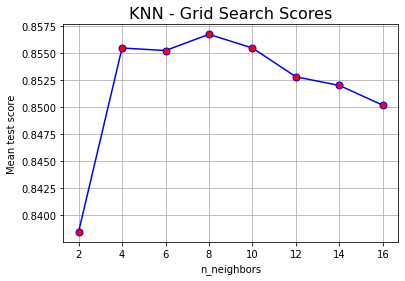

In [46]:
param_grid = {
    'n_neighbors':[2,4,6,8,10,12,14,16],
}
scores = knn_grid_search.cv_results_['mean_test_score']
plt.plot(param_grid['n_neighbors'],scores,color='blue', linestyle='solid', marker='o',
     markerfacecolor='red', markersize=7)

plt.title("KNN - Grid Search Scores", fontsize=16)
plt.xlabel('n_neighbors')
plt.ylabel('Mean test score')
plt.grid(True)
plt.show()

In [50]:
#decision tree

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['entropy'],
    'max_depth': [3,7,11,15,19,23],
    'splitter':['best','random']
}
tree_grid_search = GridSearchCV(tree,param_grid,cv=10,return_train_score=True,n_jobs=-1)
tree_grid_search.fit(X_pca,y)
#y_pred_grid = grid_search.predict(X_test_norm)
print("Grid search best accuraccy on ttest set:{:3f}".format(tree_grid_search.score(X_pca, y)))
print("Best parameters:{}".format(tree_grid_search.best_params_))
print("Best cv score:{}".format(tree_grid_search.best_score_))
print("Best estimator:\n{}".format(tree_grid_search.best_estimator_))

Grid search best accuraccy on ttest set:0.873067
Best parameters:{'criterion': 'entropy', 'max_depth': 11, 'splitter': 'best'}
Best cv score:0.7717
Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=11)


In [105]:
for mean_score, rank, params in zip(tree_grid_search.cv_results_['mean_test_score'],
                                   tree_grid_search.cv_results_['rank_test_score'],
                                   tree_grid_search.cv_results_['params']):
    print("Mean test score is {:0.3f}, and rank is {:0.0f}) for {}".format(
            mean_score, rank, params))

Mean test score is 0.535, and rank is 11) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
Mean test score is 0.414, and rank is 12) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
Mean test score is 0.728, and rank is 9) for {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}
Mean test score is 0.669, and rank is 10) for {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Mean test score is 0.772, and rank is 1) for {'criterion': 'entropy', 'max_depth': 11, 'splitter': 'best'}
Mean test score is 0.742, and rank is 6) for {'criterion': 'entropy', 'max_depth': 11, 'splitter': 'random'}
Mean test score is 0.764, and rank is 2) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Mean test score is 0.746, and rank is 5) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}
Mean test score is 0.757, and rank is 4) for {'criterion': 'entropy', 'max_depth': 19, 'splitter': 'best'}
Mean test score is 0.742, and 

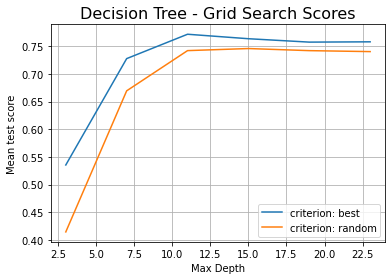

In [119]:
param_grid = {
    'criterion':['entropy'],
    'max_depth': [3,7,11,15,19,23],
    'splitter':['best','random']
}

scores = tree_grid_search.cv_results_['mean_test_score']
best,random = scores[::2], scores[1::2]
scores = [best,random]

for ind, i in enumerate(param_grid['splitter']):
    plt.plot(param_grid['max_depth'], scores[ind], label='criterion: ' + str(i))
plt.legend()
plt.title("Decision Tree - Grid Search Scores", fontsize=16)
plt.xlabel('Max Depth')
plt.ylabel('Mean test score')
plt.grid(True)
plt.show()

In [54]:
#svm
#best accuracy is 88.6%, Best parameters:{'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}
#gamma = 0.03,0.035,0.04,0.045,0.05 -> 0.035
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['rbf','linear'],
    'C':[5,7,9,11,13],
    'gamma':['scale']
}
#gamma = 1 / (n_features * X.var())
svm_grid_search = GridSearchCV(svm,param_grid,cv=10,return_train_score=True,n_jobs=-1)
svm_grid_search.fit(X_pca,y)#X_pca 30000, 188 y:30000,(1)
#y_pred_grid = grid_search.predict(X_test_norm)
print("Grid search best accuraccy on ttest set:{:3f}".format(svm_grid_search.score(X_pca, y)))
print("Best parameters:{}".format(svm_grid_search.best_params_))
print("Best cv score:{}".format(svm_grid_search.best_score_))
print("Best estimator:\n{}".format(svm_grid_search.best_estimator_))

Grid search best accuraccy on ttest set:0.972767
Best parameters:{'C': 9, 'gamma': 'scale', 'kernel': 'rbf'}
Best cv score:0.9004999999999999
Best estimator:
SVC(C=9)


In [106]:
for mean_score, rank, params in zip(svm_grid_search.cv_results_['mean_test_score'],
                                   svm_grid_search.cv_results_['rank_test_score'],
                                   svm_grid_search.cv_results_['params']):
    print("Mean test score is {:0.3f}, and rank is {:0.0f} for {}".format(
            mean_score, rank, params))

Mean test score is 0.900, and rank is 2 for {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Mean test score is 0.856, and rank is 6 for {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Mean test score is 0.900, and rank is 3 for {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}
Mean test score is 0.856, and rank is 7 for {'C': 7, 'gamma': 'scale', 'kernel': 'linear'}
Mean test score is 0.900, and rank is 1 for {'C': 9, 'gamma': 'scale', 'kernel': 'rbf'}
Mean test score is 0.856, and rank is 8 for {'C': 9, 'gamma': 'scale', 'kernel': 'linear'}
Mean test score is 0.900, and rank is 4 for {'C': 11, 'gamma': 'scale', 'kernel': 'rbf'}
Mean test score is 0.856, and rank is 9 for {'C': 11, 'gamma': 'scale', 'kernel': 'linear'}
Mean test score is 0.899, and rank is 5 for {'C': 13, 'gamma': 'scale', 'kernel': 'rbf'}
Mean test score is 0.856, and rank is 10 for {'C': 13, 'gamma': 'scale', 'kernel': 'linear'}


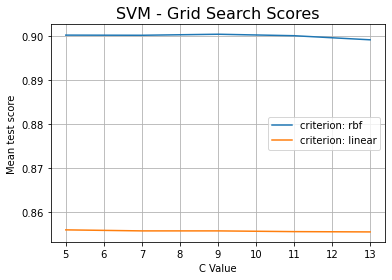

In [121]:
param_grid = {
    'kernel': ['rbf','linear'],
    'C':[5,7,9,11,13],
    'gamma':['scale']
}
scores = svm_grid_search.cv_results_['mean_test_score']
rbf,linear = scores[::2], scores[1::2]
scores = [rbf,linear]
#plt.plot(param_grid['max_depth'],scores,color='blue', linestyle='solid', marker='o',markerfacecolor='red', markersize=7)

for ind, i in enumerate(param_grid['kernel']):
    plt.plot(param_grid['C'], scores[ind], label='criterion: ' + str(i))
plt.legend()
plt.title("SVM - Grid Search Scores", fontsize=16)
plt.xlabel('C Value')
plt.ylabel('Mean test score')
plt.grid(True)
plt.show()

### 4.1.4 Classifier comparisons

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyper-parameters.

In [19]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import timeit

start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

y_pred_train_knn = knn.predict(X_pca)
print("Training Set - knn accuracy: {:.3f}".format(accuracy_score(label_train,y_pred_train_knn)))

y_pred_test_knn = knn.predict(X_predict_pca)
print("Testing Set - knn accuracy: {:.3f}".format(accuracy_score(label_test,y_pred_test_knn)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Training Set - knn accuracy: 0.873
Testing Set - knn accuracy: 0.834
Time:  13.540292099991348


In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import timeit

start = timeit.default_timer()

tree = DecisionTreeClassifier(criterion='entropy', max_depth=11)
tree.fit(X_train_pca, y_train)

y_pred_train_tree = tree.predict(X_pca)
print("Training Set - tree accuracy: {:.3f}".format(accuracy_score(label_train,y_pred_train_tree)))

y_pred_test_tree = tree.predict(X_predict_pca)
print("Testing Set - tree accuracy: {:.3f}".format(accuracy_score(label_test,y_pred_test_tree)))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Training Set - tree accuracy: 0.853
Testing Set - tree accuracy: 0.756
Time:  7.773390400005155


In [21]:
#SVM, c=9,gamma=scale -> 88%
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import timeit

start = timeit.default_timer()

svm = SVC(kernel='rbf',C=9,gamma='scale')
svm.fit(X_train_pca, y_train)

y_pred_train_svm = svm.predict(X_pca)
print("Training Set - svm accuracy: {:.3f}".format(accuracy_score(label_train,y_pred_train_svm)))

y_pred_test_svm = svm.predict(X_predict_pca)
print("Testing Set - svm accuracy: {:.3f}".format(accuracy_score(label_test,y_pred_test_svm)))


stop = timeit.default_timer()
print('Time: ', stop - start)  

Training Set - svm accuracy: 0.951
Testing Set - svm accuracy: 0.883
Time:  50.438214299996616


Original data - knn accuracy: 0.873
Reduced data - knn accuracy: 0.834

Original data - tree accuracy: 0.853
Reduced data - tree accuracy: 0.756

Original data - svm accuracy: 0.951
Reduced data - svm accuracy: 0.883

the pca svm model shows the best result.

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=9,gamma='scale')
svm.fit(X_train_pca, y_train)
y_pred_pca_svm = svm.predict(X_output_pca)

#y_output = svm.predict(X_predict)

In [14]:
y_pred_pca_svm.shape

(5000,)

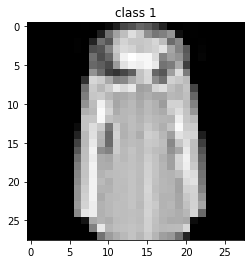

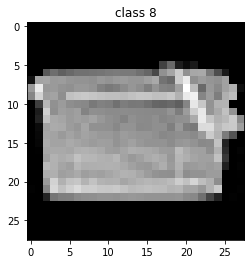

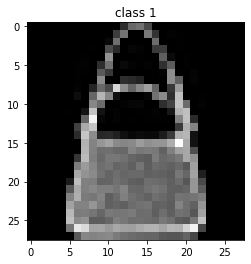

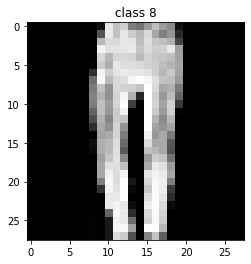

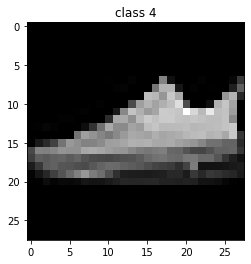

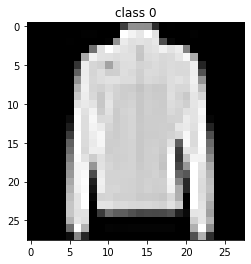

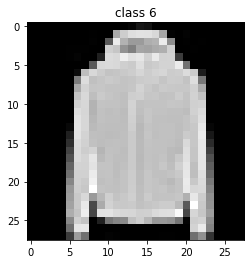

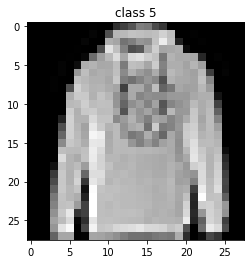

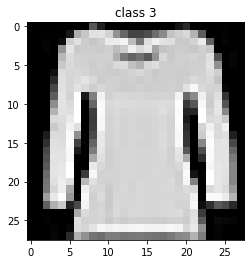

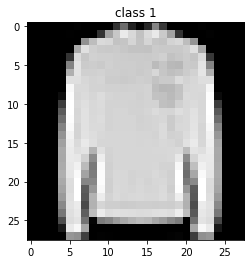

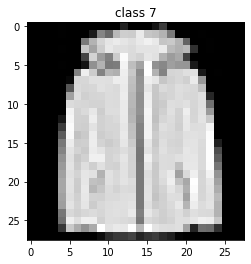

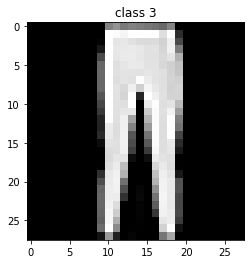

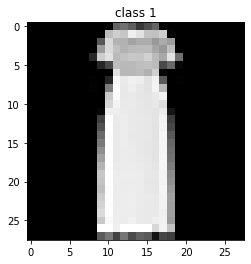

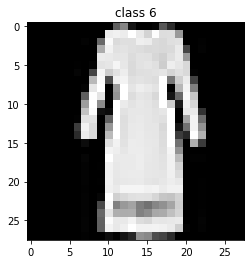

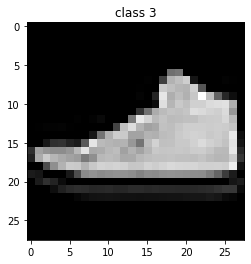

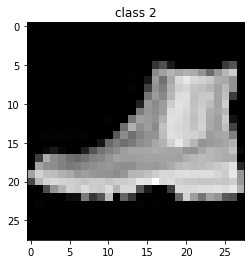

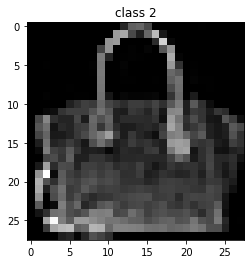

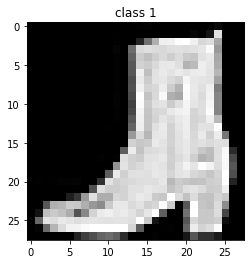

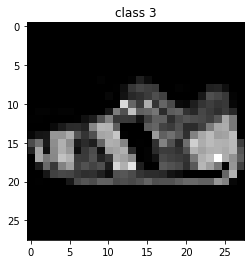

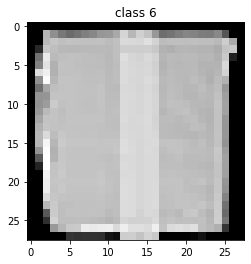

In [15]:
import matplotlib.pyplot as plt
X_output = data_test[2000:]
X_output = X_output.reshape((X_output.shape[0], 28, 28))
for i in range(20):
    plt.imshow(X_output[i], cmap=plt.get_cmap('gray'))
    plt.title("class " + str(y_pred_pca_svm[i]))
    plt.show()
    


In [16]:
import numpy as np
# assume output is the predicted labels from classifiers
# (5000,) .H5 file
with h5py.File('Output/predicted_labels.h5','w') as H:
    H.create_dataset('Output',data=y_pred_pca_svm)

## 4.2 Report

### The report must clearly show:
    1. Details of your classifiers using for assignment 1
    2. The predicted results from your classifier on test examples
    3. Results comparison and discussion
    4. Following the format in rubric : Introduction -> Methods -> Experiments result and discussion -> Conclusion
    5. The maximum length of the report is 10 (including references)
    6. Clearly provide instructions on how to run your code in the Appendix section of your report
    7. Detail of student including ID, name.

# 5. Instructions to hand in the assignment

### Go to Canvas -> Assignments -> "Assignment 1" and submit 3 files only: the report and the code files.

1) Report (a .pdf file).

2) Code (2 files include: a .ipynb file and a PDF file). PDF is exported from .ipynb file for plagiarism check.
The code must be able to be run with the following folder structure:

    - Classifiers (the root folder): Your .ipynb file containing Python code will be placed on this folder when we test and run your code. The PDF file is generated from .ipynb file (File => Save as PDF file)
    
    - Input (a sub-folder under Algorithm): We will copy the dataset into this Input folder when we run your code. Please make sure your code is able to read the dataset from this Input folder.
    
    - Output (a sub-folder under Algorithm): Your code must be able to generate a prediction file named “predicted_labels.h5” to be saved in this Output folder. The prediction file should contain predicted labels of the test dataset. We will use your prediction output file for grading purpose.

Since this is a individual work, each student needs to submit all the files which must be named with student ID numbers following format e.g. **SIDxxxx_report.pdf**,  **SIDxxxx_code.ipynb**, **SIDxxxx_code.ipynb.pdf**.

### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

### All files required for assignment 1 can be downloaded from Canvas -> Assignments -> Assignment 1


# 6. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating! You can discuss the assignment with another student, this is a legitimate collaboration, but you cannot complete the assignment together – this is an individual assignment and everyone must write their own code.